# BACKGROUND

# The training dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.

# Each individual is classified into four mutually exclusive categories:

   # No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
   # Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
   # Mm_only: Individuals who use mobile money only
   # Mm_plus: Individuals who use mobile money and also use at least one of the other financial    services (savings, credit, insurance)

# This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

# 1. Dataset examination. Are there any missing observations or columns where the data do not seem valid?

In [18]:
# Loading in required libraries/modules:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import webbrowser
from folium.plugins import MarkerCluster

%matplotlib inline


In [19]:
#Reading the data set
financials = pd.read_csv("training.csv")
financials.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [20]:

#checking missing data 
missing_values = financials.isnull().sum().sum()
print('Number of missing values:',missing_values)


Number of missing values: 0


In [21]:
#renaming columns name
financials = financials.rename(columns={'Q1':'age',
                                        'Q2':'gender',
                                        'Q3':'marital_status',
                                        'Q4':'highest_level_education',
                                        'Q5':'plot_ownership',
                                        'Q6':'land_ownership',
                                        'Q7':'mobile_phone',
                                        'Q8_1':'salaries_wages',
                                        'Q8_2':'trading',
                                        'Q8_3':'service',
                                        'Q8_4':'piece_job',
                                        'Q8_5':'rental_income',
                                        'Q8_6':'investments',
                                        'Q8_7':'pension',
                                        'Q8_8':'grant',
                                        'Q8_9':'dependent',
                                        'Q8_10':'paid_expences',
                                        'Q8_11':'other1',
                                        'Q12':'sent_money_in_12_months',
                                        'Q13':'when_last_send_money',
                                        'Q14':'recieved_money_in_12_months',
                                        'Q15':'when_last_recieve_money',
                                        'Q16':'purchase',
                                        'Q17':'pay',
                                        'Q18':'literacy_Kiswhahili',
                                        'Q19':'literacy_english'})



types_income= financials[['age','gender','marital_status','land_ownership',
                          'salaries_wages','trading', 'service','purchase',
                          'piece_job', 'rental_income', 'investments', 'pension',
                          'grant', 'dependent', 'paid_expences', 'other1']]

# 2. Basic descriptive statistics for the dataset.

In [22]:
#Get basic descriptive statistics for the dataset.
financials.describe()

,ID,age,gender,marital_status,highest_level_education,plot_ownership,land_ownership,mobile_phone,salaries_wages,trading,...,pay,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


# 3. Appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

# Age vs Mobile Money Classification plots

In [23]:
# Filtering the original dataset in order to access the desired columns for the various financial services accessed
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]


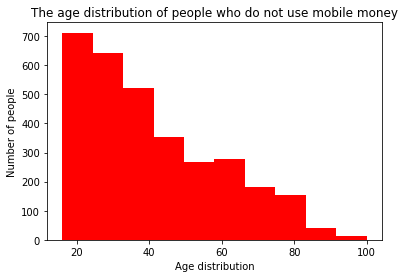

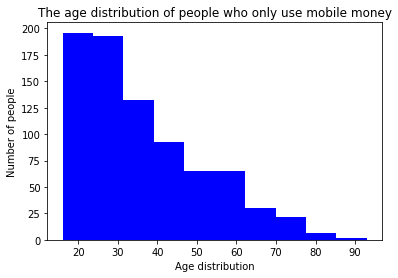

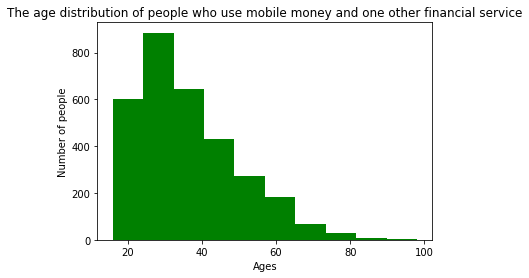

In [24]:
# Age vs Financial services plots
age_non = non.age
age_mobile = mobile.age
age_both = both.age

plt.hist(age_non, color = ['red'])
plt.xlabel('Age distribution')
plt.ylabel('Number of people')
plt.title('The age distribution of people who do not use mobile money')
plt.show()

plt.hist(age_mobile, color = ['blue'])
plt.xlabel('Age distribution')
plt.ylabel('Number of people')
plt.title('The age distribution of people who only use mobile money')
plt.show()

plt.hist(age_both, color = ['green'])
plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.title('The age distribution of people who use mobile money and one other financial service')
plt.show()

# Gender vs Mobile Money classification summation

In [25]:
#checking how many females and males who are using the mobile money and those who are not using it.
females = financials[financials.gender == 2]

f0 = len(females[females.mobile_money_classification == 0])
f1 = len(females[females.mobile_money_classification == 1])
f2 = len(females[females.mobile_money_classification == 2])
f3 = len(females[females.mobile_money_classification == 3])
f = f1 + f2 + f3 + f0 
print('Females without Mobile Money or any othe financial services:',f0)
print('Females without Mobile Money but use other financial services:',f1)
print('Females with Mobile Money but dont use other financial services:',f2)
print('Females with both Mobile Money and other financial services:',f3)
print('Total number of females:',f)


Females without Mobile Money or any othe financial services: 918
Females without Mobile Money but use other financial services: 1083
Females with Mobile Money but dont use other financial services: 450
Females with both Mobile Money and other financial services: 1521
Total number of females: 3972


In [26]:

males = financials[financials.gender == 1]

m0 = len(males[males.mobile_money_classification == 0])
m1 = len(males[males.mobile_money_classification == 1])
m2 = len(males[males.mobile_money_classification == 2]) 
m3 = len(males[males.mobile_money_classification == 3])
m = m1 + m2 + m3 + m0
print('Males without Mobile Money or any othe financial services')
print('Males without Mobile Money but use other financial services:',m1)
print('Males with Mobile Money but dont use other financial services:',m2)
print('Males with both Mobile Money and other financial services:',m3)
print('Total number of males:',m)

Males without Mobile Money or any othe financial services
Males without Mobile Money but use other financial services: 695
Males with Mobile Money but dont use other financial services: 354
Males with both Mobile Money and other financial services: 1605
Total number of males: 3122


In [27]:
p0 = f0 + m0
p1 = f1 + m1
p2 = f2 + m2
p3 = f3 + m3
p4 = p0 + p1 + p2 + p3

print('Total number of people without mobile money and do not use other financial services:',p0)
print('Total number of people without mobile money but use other financial services:',p1)
print('Total number of people with mobile money  but dont use other financial services:',p2)
print('Total number of people with mobile money and other financials services:',p3)
print('total number of people:', p4)

Total number of people without mobile money and do not use other financial services: 1386
Total number of people without mobile money but use other financial services: 1778
Total number of people with mobile money  but dont use other financial services: 804
Total number of people with mobile money and other financials services: 3126
total number of people: 7094


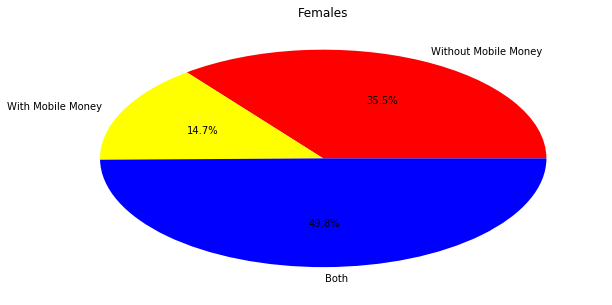

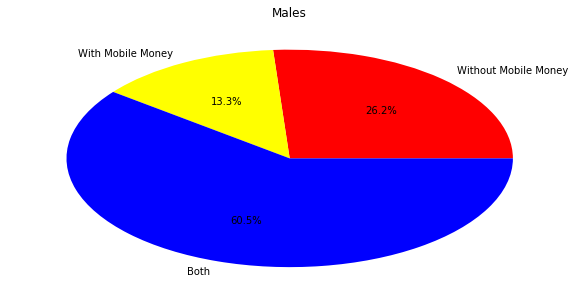

In [28]:
# For females Calculate piechart sizes
f_without = f1 / f * 100
f_with = f2/f * 100
f_both = f3/f * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Without Mobile Money','With Mobile Money','Both']
sizes = [f_without,f_with,f_both]
colors = ['red', 'yellow','blue']


# Plot the pie chart
plt.pie(sizes, explode=None, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Females')
plt.show()


#  For males Calculate piechart sizes
m_without = m1 / m * 100
m_with = m2/m * 100
m_both = m3/m * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Without Mobile Money','With Mobile Money','Both']
sizes = [m_without, m_with,m_both]
colors = ['red', 'yellow', 'blue']


# Plot the pie chart
plt.pie(sizes, explode=None, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Males')     
plt.show()



In [29]:
#calculating ratios for the chart
m0 = round(len(males[males.mobile_money_classification == 0]) / len(financials) * 100,1)
print(m0)
m1 = round(len(males[males.mobile_money_classification == 1]) / len(financials) * 100,1)
print(m1)
m2 = round(len(males[males.mobile_money_classification  == 2]) / len(financials) * 100,1)
print(m2)
m3 = round(len(males[males.mobile_money_classification == 3]) / len(financials) * 100,1)
print(m3)

f0 = round(len(females[females.mobile_money_classification == 0]) / len(financials) * 100,1)
print(f0)
f1 = round(len(females[females.mobile_money_classification == 1]) / len(financials) * 100,1)
print(f1)
f2 = round(len(females[females.mobile_money_classification == 2]) / len(financials) * 100,1)
print(f2)
f3 = round(len(females[females.mobile_money_classification == 3]) / len(financials) * 100,1)
print(f3)



6.6
9.8
5.0
22.6
12.9
15.3
6.3
21.4


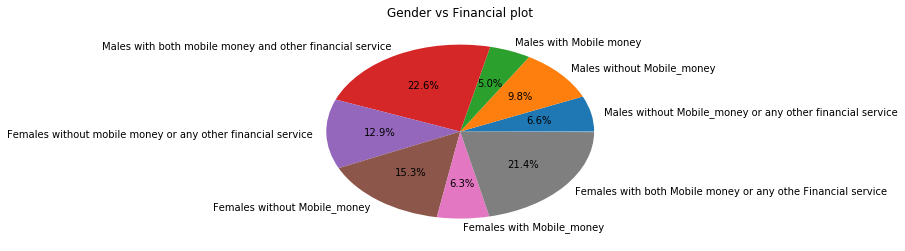

In [30]:
#plotting a pie chart

ratios = [.066, .098, .050, .226, 0.129, .153, .063, .214]
labels=['Males without Mobile_money or any other financial service','Males without Mobile_money','Males with Mobile money','Males with both mobile money and other financial service','Females without mobile money or any other financial service','Females without Mobile_money', 'Females with Mobile_money','Females with both Mobile money or any othe Financial service']
plt.pie(ratios,explode=None, labels=labels, autopct='%1.1f%%')
                                                                          

plt.title('Gender vs Financial plot')
plt.show()

# Relationship status vs Mobile Money Classification 

Text(0.5,1,'Relationship Status vs Financials')

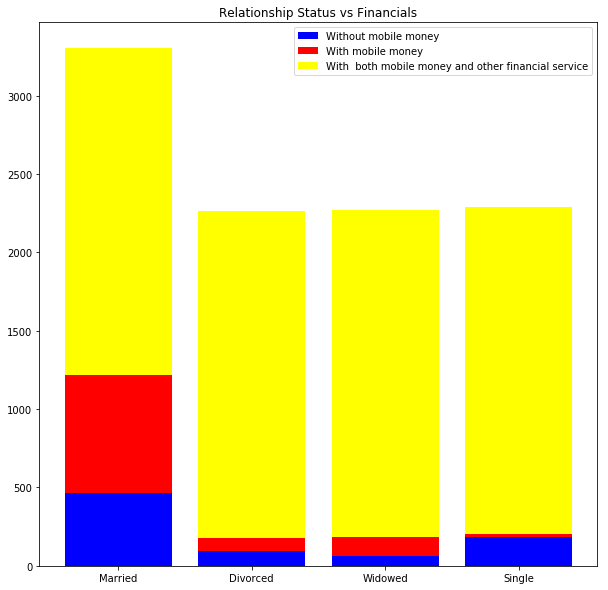

In [31]:


# Relationship status
married = financials[financials.marital_status == 1]
divorced = financials[financials.marital_status == 2]
widowed = financials[financials.marital_status == 3]
single = financials[financials.marital_status == 4]

# status on mobile money classification
married_without = len(married[married.mobile_money_classification == 1])
married_with = len(married[married.mobile_money_classification == 2])
married_both = len(married[married.mobile_money_classification == 3])

divorced_without = len(divorced[divorced.mobile_money_classification == 1])
divorced_with = len(divorced[divorced.mobile_money_classification == 2])
divorced_both = len(married[married.mobile_money_classification == 3])

widowed_without = len(widowed[widowed.mobile_money_classification == 1])
widowed_with = len(widowed[widowed.mobile_money_classification == 2])
widowed_both = len(married[married.mobile_money_classification == 3])

single_without = len(single[single.mobile_money_classification == 1])
single_with = len(single[single.mobile_money_classification == 2])
single_both = len(married[married.mobile_money_classification == 3])

# sum of people with or without mobile money
relationship_with = [married_with, divorced_with, widowed_with, single_with]
relationship_without= [married_without, divorced_without, widowed_without, single_without]
relationship_both = [married_both,divorced_both,widowed_both,single_both]
#plotting the graph for relationship status and people with or without mobile money
plt.figure(figsize=(10,10))
plt.bar(np.arange(4), relationship_with, label='Without mobile money',color='blue')
plt.bar(np.arange(4), relationship_without, bottom= relationship_with, label='With mobile money',color='red')
plt.bar(np.arange(4), relationship_both, bottom= relationship_without, label='With  both mobile money and other financial service',color='yellow')
plt.xticks(np.arange(4), ['Married', 'Divorced', 'Widowed', 'Single'])
plt.legend(loc='upper right')
plt.title('Relationship Status vs Financials')



# Types of Income vs Mobile Money Classification

# People with or without salaries vs Mobile Money Classification

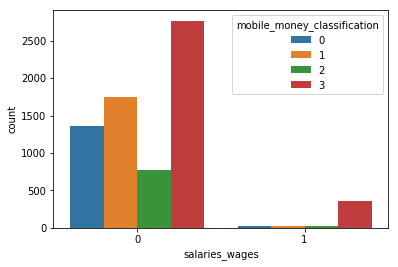

In [32]:
# Salaries vs Mobile Money classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.salaries_wages, hue='mobile_money_classification', data=financials)

# People who get money through  trading/selling Anything they produce/grow/raise/make/collect with the intention of selling vs Mobile Money Classification

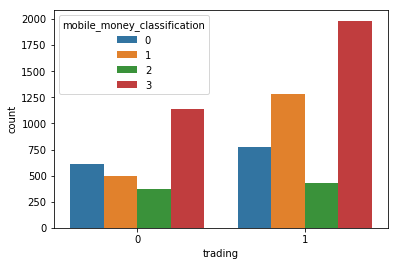

In [33]:
# Trading vs mobile Money classification
non = financials[(financials.mobile_money_classification == 0)
                 | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.trading, hue='mobile_money_classification', data=financials)

# People who get money from  providing a service – i.e. such as transport, hairdressing, processing, hospitality services (food & accommodation) vs Mobile Money Classification

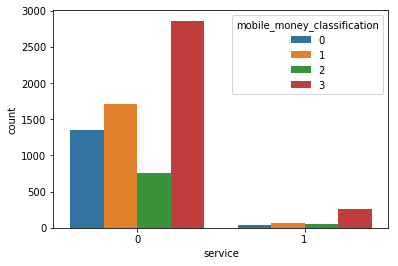

In [34]:
# service vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.service, hue='mobile_money_classification', data=financials)

# People who have piece work/Casual labor/Occasional jobs

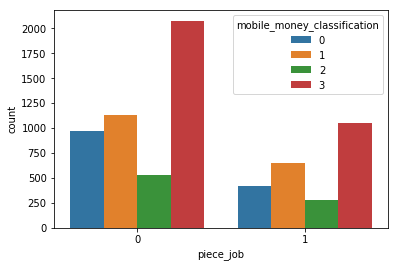

In [35]:
# Piece_job vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.piece_job, hue='mobile_money_classification', data=financials)

# People who have Rental income vs Mobile Money Classification

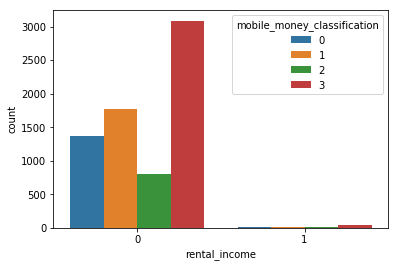

In [36]:
# Rental_income vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.rental_income, hue='mobile_money_classification', data=financials)

# People who get money through Interest from savings, investments, stocks, unit trusts etc.

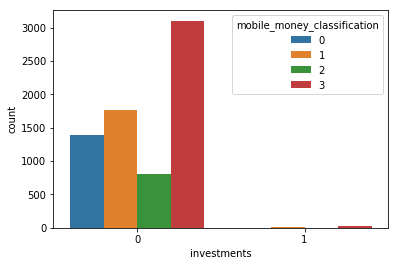

In [37]:
# Investment vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]
sns.countplot(financials.investments, hue='mobile_money_classification', data=financials)

# People who are getting  Pension vs Mobile Money Classification

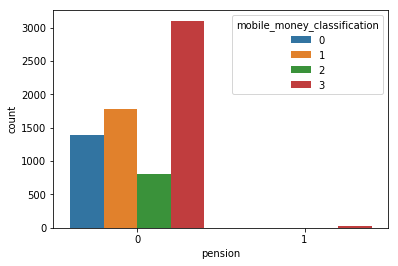

In [38]:
#Pensions vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.pension, hue='mobile_money_classification', data=financials)

# People who are getting social welfare money/grant from Government vs Mobile Money Classification

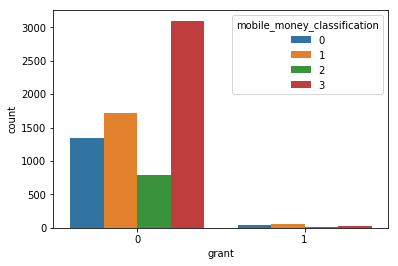

In [39]:
#Social_welfare vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.grant, hue='mobile_money_classification', data=financials)

# People who rely on someone else/others to give/send me money vs Mobile Money Classification

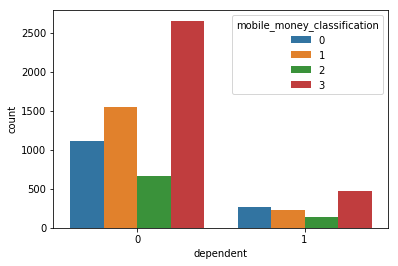

In [40]:
#dependent vs Mobile 
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.dependent, hue='mobile_money_classification', data=financials)

# People who get money through other methods vs Mobile Money Classification

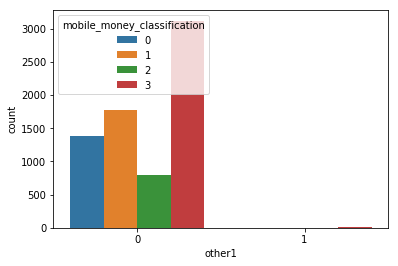

In [41]:
# Other vs Mobile Money Classification
non = financials[(financials.mobile_money_classification == 0) | (financials.mobile_money_classification == 1)]

mobile = financials[(financials.mobile_money_classification == 2)]

both = financials[(financials.mobile_money_classification == 3)]

sns.countplot(financials.other1, hue='mobile_money_classification', data=financials)

# Land Ownership vs Mobile Money Classification

# People who or dont own land vs Mobile Money Classification

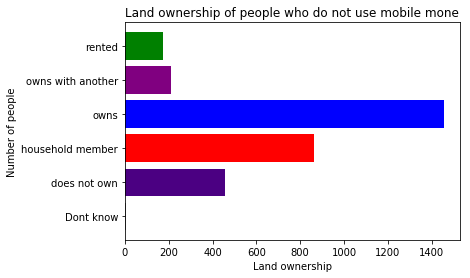

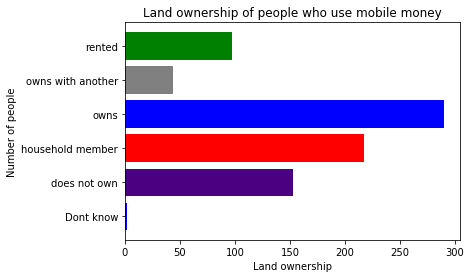

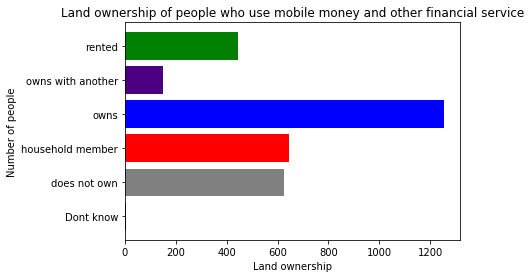

In [42]:
# Land ownership vs Financial services plot
land_ownership_none = non.plot_ownership
land_ownership_mobile = mobile.plot_ownership
land_ownership_both = both.plot_ownership

land_owner = land_ownership_none.groupby(land_ownership_none.iloc[:-1]).count()
land_ownership_none_list = list('')
labels = ['owns','owns with another','household member','rented','does not own','Dont know']
for i in land_owner :
    land_ownership_none_list.append(i)
    
plt.barh(labels, land_ownership_none_list, color = ['blue','purple','red', 'green', 'indigo', 'gray'])
plt.xlabel('Land ownership')
plt.ylabel('Number of people')
plt.title('Land ownership of people who do not use mobile mone')
plt.show()

l_o = land_ownership_mobile.groupby(land_ownership_mobile.iloc[:-1]).count()
land_ownership_mobile_list = list('')
labels = ['owns','owns with another','household member','rented','does not own','Dont know']
for i in l_o :
    land_ownership_mobile_list.append(i)
    
plt.barh(labels, land_ownership_mobile_list, color = ['blue','gray','red', 'green', 'indigo'])
plt.xlabel('Land ownership')
plt.ylabel('Number of people')
plt.title('Land ownership of people who use mobile money')
plt.show()

l_o = land_ownership_both.groupby(land_ownership_both.iloc[:-1]).count()
land_ownership_both_list = list('')
labels = ['owns','owns with another','household member','rented','does not own','Dont know']
for i in l_o :
    land_ownership_both_list.append(i)
    
plt.barh(labels, land_ownership_both_list, color = ['blue','indigo','red', 'green', 'gray'])
plt.xlabel('Land ownership')
plt.ylabel('Number of people')
plt.title('Land ownership of people who use mobile money and other financial service')
plt.show()

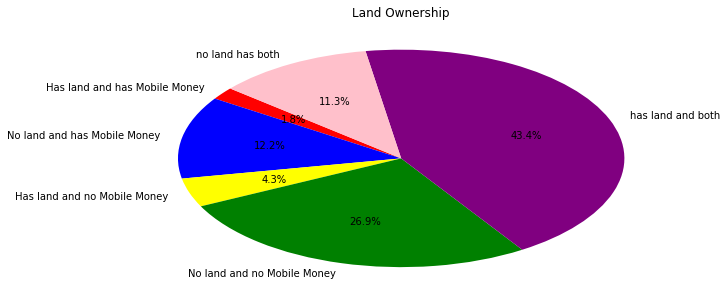

In [43]:
# Land ownership vs Mobile Money

has_no_mobile_money = financials[financials.mobile_money_classification == 1]
has_mobile_money = financials[financials.mobile_money_classification == 2]
both_mobile_money = financials[financials.mobile_money_classification == 3]

has_land_has_mobile_money = len(has_mobile_money[has_mobile_money.land_ownership == 1])
no_land_has_mobile_money = len(has_mobile_money[has_mobile_money.land_ownership == 2]) 
has_land_has_both = len(both_mobile_money [both_mobile_money.land_ownership == 1])

has_land_no_mobile_money = len(has_no_mobile_money[has_no_mobile_money.land_ownership == 1])
no_land_no_mobile_money = len(has_no_mobile_money[has_no_mobile_money.land_ownership == 2])
no_land_has_both = len(both_mobile_money[both_mobile_money.land_ownership == 2])

total = has_land_has_mobile_money + no_land_has_mobile_money + has_land_has_both + has_land_no_mobile_money + no_land_no_mobile_money + no_land_has_both 

# Calculate piechart sizes
land_mm = has_land_has_mobile_money / total * 100
no_land_mm = no_land_has_mobile_money / total * 100
land_no_mm = has_land_no_mobile_money / total * 100
no_land_no_mm = no_land_no_mobile_money / total * 100
no_land_b = no_land_has_both / total * 100
land_b = has_land_has_both / total *100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Has land and has Mobile Money','No land and has Mobile Money',
          'Has land and no Mobile Money','No land and no Mobile Money' ,
         'has land and both','no land has both']
sizes = [land_mm, no_land_mm, land_no_mm,no_land_no_mm,no_land_b,land_b]
colors = ['red', 'blue', 'yellow', 'green','purple','pink']


# Plot the pie chart
plt.pie(sizes, explode=None, colors=colors, labels=labels, autopct='%1.1f%%',  startangle=140)
plt.title('Land Ownership')
plt.show()
    

# 4.Appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

# The relationship between how often mobile services are used and age

In [44]:
num_to_word= {
    -1: 'NA',
     1: 'Never',
     2: 'Daily',
     3: 'Weekly',
     4: 'Monthly',
     5: 'Less than monthly'}
financials['purchase']= types_income['purchase'].map(num_to_word)

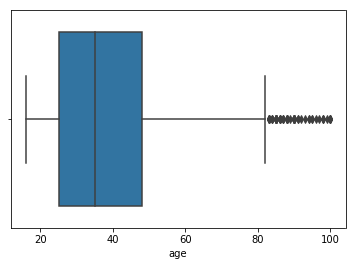

In [45]:
sns.boxplot(financials.age, hue='purchase', data=financials)



# The relationship between how often mobile services are used and gender

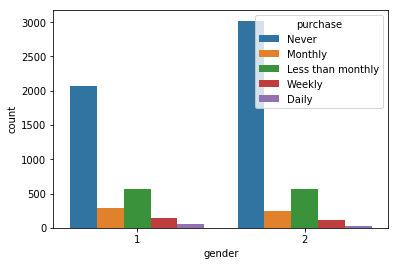

In [46]:
sns.countplot(financials.gender, hue='purchase', data=financials)

# The relationship between how often mobile services are used and marital status

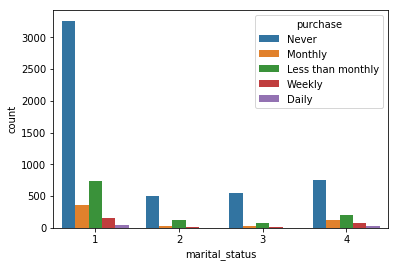

In [47]:
sns.countplot(financials.marital_status, hue='purchase', data=financials)

# The relationship between how often mobile services are used and land ownership

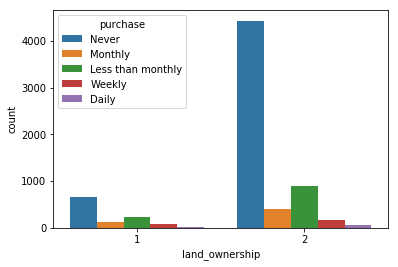

In [48]:
sns.countplot(financials.land_ownership, hue='purchase', data=financials)

# The relationship between how often mobile services are used and types of income

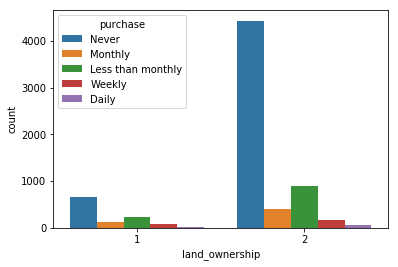

In [49]:
sns.countplot(financials.land_ownership, hue='purchase', data=financials)


#  5.A map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [50]:
# Plot Map: mobile_money vs salaries_wages
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["salaries_wages"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [51]:
# Plot Map: mobile_money vs trading
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["trading"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map    

In [52]:
# Plot Map: mobile_money vs service
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["service"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [ ]:
# Plot Map: mobile_money vs piece_job
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["piece_job"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [55]:
# Plot Map: mobile_money vs rental_income
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["rental_income"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [56]:
# Plot Map: mobile_money vs investments
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["investments"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [57]:
# Plot Map: mobile_money vs pension
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["pension"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [58]:
# Plot Map: mobile_money vs grant
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["grant"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [59]:
# Plot Map: mobile_money vs dependent
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["dependent"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [62]:
# Plot Map: mobile_money vs paid_expences
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["paid_expences"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

In [63]:
# Plot Map: mobile_money vs other1
lat = -6.161184
long = 35.745426

trading_data = financials[(financials["mobile_money"] == 1) & (financials["other1"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
trading_map

# 6.What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?



 # After analysing the dataframe of Tanzanian mobile money users containing 7094 records, it is clear that  the people still prefer using cash and other fanancial services over mobile money services.

 # Young people are active mobile money users than old people, so there is still a large number of people who are not using the mobile money services.  I think with the right campaigns the mobile money service providers  can reach more clients. 

# Married people are target for the mobile money services as they is more of them using it. Traders make more money but not most of them use the mobile money services, so  they are also the right target market to approach.  

 # An intensive campaign to introduce the mobile money services to potential clients will definetly attract more people in using it and  grow its subscription as there is still a large number of people who are not using it.

# Most people in our data stay in the rural areas of the country. They  rely on trading to make money as they stay near the shore so its easy for them to ship their goods to other places. They rely on agriculture as their main source of production.
